<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/Image_Processing/2020_11_18_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020.11.18.

In class

# Practice 1

# Import image from drive

In [13]:
import imageio
import pylab as pl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd '/content/drive/Shareddrives/PUS2020'

/content/drive/Shareddrives/PUS2020


In [19]:
img = imageio.imread("Cambodia.jpg")

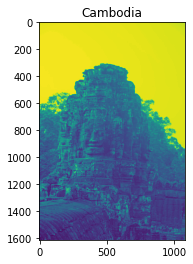

In [59]:
pl.imshow(img)
pl.title("Cambodia");

In [21]:
img.dtype

dtype('uint8')

In [23]:
img.max() # max color value is 255

255

In [26]:
# For example
[0., 5.]
[0., 2.5, 5.]


[0.0, 2.0, 5.0]

In [28]:
img = img.astype(float) # float(img) - is another way

In [27]:
img.shape

(1616, 1080, 3)

# Normalization of data values

In [29]:
import numpy as np

In [30]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
img = NormalizeData(img)
img
#img = img/255 is another way

Array([[[0.94901961, 0.95294118, 0.96078431],
        [0.94901961, 0.95294118, 0.96078431],
        [0.94901961, 0.95294118, 0.96078431],
        ...,
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176]],

       [[0.94901961, 0.95294118, 0.96078431],
        [0.94901961, 0.95294118, 0.96078431],
        [0.94901961, 0.95294118, 0.96078431],
        ...,
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176]],

       [[0.94901961, 0.95294118, 0.96078431],
        [0.94901961, 0.95294118, 0.96078431],
        [0.94901961, 0.95294118, 0.96078431],
        ...,
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176],
        [0.87058824, 0.89803922, 0.92941176]],

       ...,

       [[0.1372549 , 0.14117647, 0.12156863],
        [0.1372549 , 0.14117647, 0.12156863],
        [0.16078431, 0

In [32]:
# Change to black and white
img = img.mean(-1)

In [35]:
img

array([[0.95424837, 0.95424837, 0.95424837, ..., 0.89934641, 0.89934641,
        0.89934641],
       [0.95424837, 0.95424837, 0.95424837, ..., 0.89934641, 0.89934641,
        0.89934641],
       [0.95424837, 0.95424837, 0.95424837, ..., 0.89934641, 0.89934641,
        0.89934641],
       ...,
       [0.13333333, 0.13333333, 0.15686275, ..., 0.36078431, 0.37777778,
        0.4248366 ],
       [0.14901961, 0.14117647, 0.15294118, ..., 0.36078431, 0.38562092,
        0.44705882],
       [0.14117647, 0.1254902 , 0.12941176, ..., 0.35294118, 0.37777778,
        0.43921569]])

# Plot black and white image

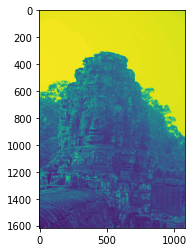

In [42]:
pl.imshow(img)

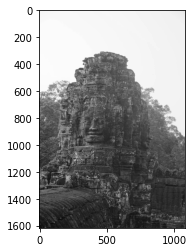

In [39]:
# - Make black and white
pl.imshow(img, cmap="gray")

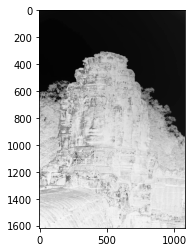

In [41]:
pl.imshow(img, cmap="Greys") # Check "Greys" is converting the values of black and white; grey map is 0 to black, 1 to white 

# Make a low contrast and a high contrast version of your image

In [46]:
# - Change in the contrast of the image (a.k.a. Gamma correction)
# 10 is going to 5, 15 is going to 25
# Range is between 0 and 1 but compress the values

# - The goal is to make a low contrast and a high contrast version of your image


## First way is putting values directly 

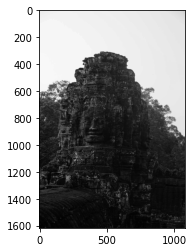

In [54]:
pl.imshow(img**2, cmap="gray")

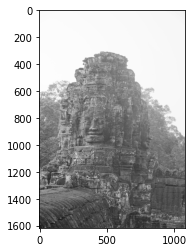

In [55]:
pl.imshow(img**0.5, cmap="gray")

## Second way is using package of skimage

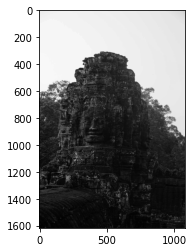

In [56]:
from skimage import exposure
gamma_high = exposure.adjust_gamma(img, 2) #higher than 1
pl.imshow(gamma_high, cmap="gray")

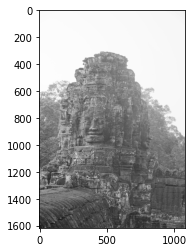

In [57]:
gamma_low = exposure.adjust_gamma(img, 0.5) #lower than 1
pl.imshow(gamma_low, cmap="gray")

#Practice 2

In [60]:
otherim = imageio.imread("https://github.com/fedhere/PUS2020_FBianco/blob/master/" + 
    "imgProcessingABC/imgs/1-new-york-city-1270751697.jpg?raw=true")

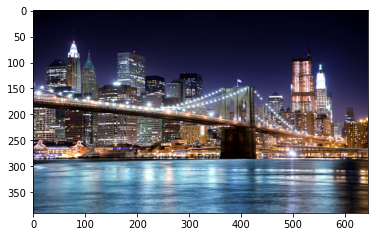

In [62]:
im = pl.imshow(otherim)
im

In [65]:
otherim.shape

(390, 645, 3)

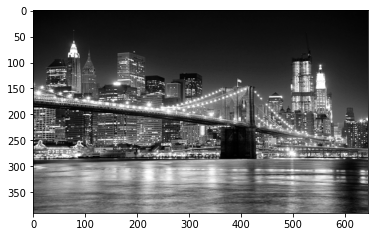

In [69]:
# From a black and white image, lets select the brightest lights
bwrawimg = (otherim.astype(float) / 255.).mean(axis=-1) #axis = -1 means the last axis in otherim.shape
pl.imshow(bwrawimg, cmap="gray")

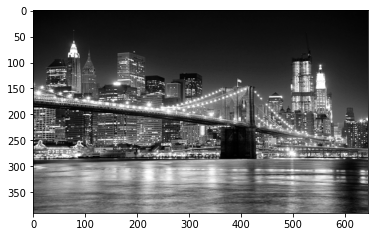

In [70]:
bwrawimg = (otherim.astype(float) / 255.).mean(axis=2)
pl.imshow(bwrawimg, cmap="gray")

In [87]:
onlylights = bwrawimg.copy()
img_mean, img_std = bwrawimg.mean(), bwrawimg.std()

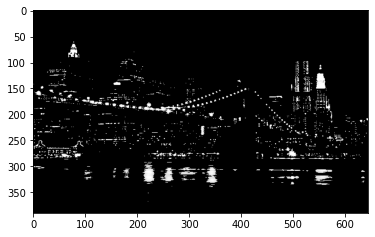

In [88]:
onlylights[onlylights < (img_mean + 2*img_std) ] = 0 # 3 sigma stands for 95%  and since it is high. change to 2 sigma
pl.imshow(onlylights, cmap="gray")